In [1]:
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt

In [2]:
#Baixa e importa 'holidays' para acessar datas dos feriados nacionais
#pip install holidays
import holidays
feriados = holidays.Brazil()

In [3]:
#Carrega a planilha de Excel em um dataframe Pandas
df = pd.read_excel(r'C:\Users\hm007677\OneDrive\Odilon Behrens\Ticket Total.xlsm','Tickets Total')

In [4]:
df

,OS,Unidade,Equipamento,Patrimônio,Nome,Abertura,Fechamento,Comentário,Situação,Tempo de OS,...,Tempo de execução,Tempo de espera,Tempo de espera considera Sexta,Auxiliar,Empresa ou Técnico,Mês de abertura,Mês de encerramento,Mês de execução,Sobra do mês,Observação
0,21882.0,CTI - Poli,NaN,NaN,Adalberto,2018-01-01 14:00:26,2018-01-11 08:58:27,CAMA MUKA COM CABO DE ENERGIA COM PINO QUEBRAD...,closed,1900-01-09 18:58:01,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
1,21883.0,Bloco Obstétrico,Doppler Fetal,DM5335,Maurício,2018-01-02 08:15:28,2018-01-11 08:52:42,desconfigurado,closed,1900-01-09 00:37:14,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
2,21884.0,Odontologia,Cuspideira,000194E,Vânio,2018-01-02 08:33:33,2018-01-11 09:18:09,Intenso vazamento de Ã¡gua na cuspideira da sa...,closed,1900-01-09 00:44:36,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
3,21885.0,Odontologia,Equipo Odontológico,001223E,Vânio,2018-01-02 08:34:16,2018-01-11 09:12:36,"Mangueira da seringa trÃ­plice da sala 08, com...",closed,1900-01-09 00:38:20,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
4,21887.0,UNSA - Unidade Nossa Senhora Aparecida,NaN,NaN,Adalberto,2018-01-02 08:45:08,2018-01-10 10:56:48,ESTATIVA AGARRANDO,closed,1900-01-08 02:11:40,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12251,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
12252,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
12253,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
12254,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [5]:
#Armazena em um novo dataframe os dados de interesse
df2 = df.loc[df['Abertura']>'2020-01-01']

In [6]:
#Seleciona as colunas de interesse, agrupa e conta as colunas que não foram agrupadas
df2[['Patrimônio','Equipamento','OS']].groupby(['Patrimônio','Equipamento']).count()

,,OS
Patrimônio,Equipamento,
000435E,Monitor Multiparâmetro Modular,4
000705E,Incubadora Neonatal,5
000733E,Berço Aquecido,1
001291E,Mesa Cirúrgica,2
002480E,Balança Infantil,1
...,...,...
dec 001532E,Câmera de VídeoCirurgia,1
dec 001568E,Câmera de Endoscopia,1
ho b- DT3605,Cama Eletrônica,1


In [7]:
#Usa .dt.hour para modificar o datetime da coluna 'Abertura'.
df2[['OS']].groupby(df2['Abertura'].dt.hour).count()

,OS
Abertura,
0,10
1,13
2,12
3,7
5,6
6,1
7,29
8,73
9,378


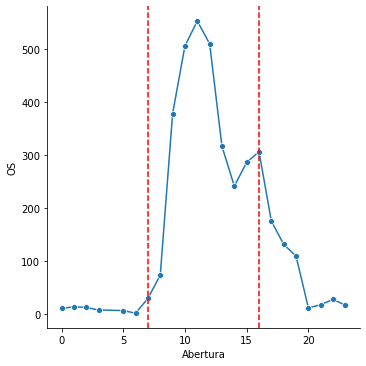

In [8]:
#Plota gráfico das OS abertas por horas. As linhas vermelhas indicam os limites do horário de trabalho dos técnicos
ax = snb.relplot(data = df2[['OS']].groupby(df2['Abertura'].dt.hour).count(),x='Abertura',y='OS',marker = 'o',kind ='line')
plt.axvline(16,0,linestyle = '--',color ='red')
plt.axvline(7,0,linestyle = '--',color ='red')

In [9]:
#Conta as OS agrupadas por equipamentos e seus patrimônios
df2[['Equipamento','Patrimônio','OS']].groupby(['Equipamento','Patrimônio']).count().sort_values('OS',ascending=False)

OS
Equipamento               Patrimônio     
Termodesinfectora         DT3083       14
Autoclave                 DT 5091      12
                          002731E      12
Tomógrafo Computadorizado 5410         11
Incubadora Neonatal       000502E       9
...                                    ..
Bomba de Infusão          002135E       1
                          002136E       1
                          002143M       1
                          002144E       1
Válvula de vácuo          HOBCFO-0001   1

[817 rows x 1 columns]

In [155]:
#Calcula e altera os valores de 'Tempo de OS'. A coluna passa a ser um timedelta
df['Tempo de OS'] = df['Fechamento'] - df['Abertura']
teste = df.loc[df['Abertura']>'2020-01-01']
teste

,OS,Unidade,Equipamento,Patrimônio,Nome,Abertura,Fechamento,Comentário,Situação,Tempo de OS,...,Tempo de execução,Tempo de espera,Tempo de espera considera Sexta,Auxiliar,Empresa ou Técnico,Mês de abertura,Mês de encerramento,Mês de execução,Sobra do mês,Observação
8470,31121.0,Bloco Cirúrgico 1º andar,Foco Cirúrgico de Teto,NaN,Marco Antônio,2020-01-01 09:24:24,2020-01-28 16:03:30,"FOCO NÃƒO LIGA, FAVOR AVALIAR",closed,27 days 06:39:06,...,03:00:00,1900-01-26 21:35:36,1900-01-26 21:35:36,NaN,NaN,1.0,1.0,1.0,NaN,0
8471,31122.0,CTI - 1,NaN,NaN,NaN,2020-01-02 07:40:39,2020-01-02 17:28:48,vÃ¡cuo do box 4 nÃ£o funciona.,closed,0 days 09:48:09,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
8472,31123.0,CTI - 2,Monitor Multiparâmetro Modular,000476E,EasyTech,2020-01-02 08:39:33,2020-04-15 11:45:01,Monitor nÃ£o liga AGUARDANDO EASYTECH,closed,104 days 03:05:28,...,1900-04-10 00:13:00,1900-01-01 02:18:27,1900-01-01 02:18:27,NaN,NaN,1.0,4.0,1.0,NaN,0
8473,31124.0,Clínica Cirúrgica 2º andar,NaN,NaN,Marcos Assis,2020-01-02 10:53:09,2020-01-15 16:52:00,InstalaÃ§Ã£o de 2 camas novas na enfermaria 211,closed,13 days 05:58:51,...,00:30:00,1900-01-04 00:36:51,1900-01-04 00:36:51,NaN,NaN,1.0,1.0,1.0,NaN,0
8474,31125.0,UTIN-CTI Neonatal,Monitor Multiparâmetro Modular,0002668E,Maurício,2020-01-02 14:20:53,2020-01-15 17:10:50,A TELA NÃƒO LIGA.,closed,13 days 02:49:57,...,01:00:00,1900-01-05 18:39:07,1900-01-05 18:39:07,NaN,NaN,1.0,1.0,1.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12198,35031.0,Raio-X,Raio-X Fixo,NaN,Lucas,2020-12-30 17:08:15,2021-01-04 10:38:16,"RX Shimadzu nÃ£o esta funcionando, favor verif...",closed,4 days 17:30:01,...,00:20:00,00:11:45,00:11:45,NaN,NaN,12.0,1.0,12.0,NaN,0
12199,35032.0,Bloco Obstétrico,Acessório: Cabo Placa de Bisturi,NaN,Wagner,2020-12-30 17:16:19,2021-01-04 12:01:59,"gentileza verificar ,funcionamento do cabo, o ...",closed,4 days 18:45:40,...,00:20:00,1900-01-04 15:37:41,1900-01-04 15:37:41,NaN,NaN,12.0,1.0,1.0,NaN,0
12200,35033.0,UPA/HOB,Cama Eletrônica,DM4985,Marcos Assis,2020-12-31 10:03:51,NaT,Segundo o enfermeiro a parte elÃ©trica da cama...,open,NaT,...,00:45:00,01:11:09,01:11:09,NaN,NaN,12.0,NaN,12.0,NaN,0
12201,35034.0,Clínica Médica,Ap Pa,PS2827,Interno,2020-12-31 11:43:24,NaT,Trata-se de um esfigmomanometro que a pera nÃ£...,open,NaT,...,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN


In [11]:
teste = data=df2[['OS']].groupby(df2['Abertura'].dt.hour).count()

In [12]:
#Cria o df os_feriados com a lista das OS criadas em feriados nacionais
os_feriados = df2[df2['Abertura'].dt.date.isin(feriados['2020-01-01':'2020-12-31'])]

In [21]:
os_feriados[['OS']].groupby(df2['Abertura'].dt.date).count()

,OS
Abertura,
2020-01-01,1
2020-02-25,7
2020-02-26,22
2020-04-10,3
2020-04-21,2
2020-05-01,3
2020-06-11,6
2020-09-07,14
2020-10-12,6


In [88]:
df['Tempo de OS'].groupby(df['Patrimônio']).mean()

DataError: No numeric types to aggregate

In [100]:
tempo['Tempo de OS'].astype('timedelta64[s]')

0       9 days 18:58:01
1       9 days 00:37:14
2       9 days 00:44:36
3       9 days 00:38:20
4       8 days 02:11:40
              ...      
12195   0 days 01:52:24
12197   4 days 19:04:16
12198   4 days 17:30:01
12199   4 days 18:45:40
12202   3 days 17:49:31
Name: Tempo de OS, Length: 11663, dtype: timedelta64[ns]

In [168]:
teste.groupby(['Equipamento','Nome'])['Tempo de OS'].agg([lambda x:x.mean()]).sort_values('<lambda>',ascending = False).head(30)

,,<lambda>
Equipamento,Nome,
Cuspideira,Vânio,113 days 01:48:01
Acessório: Cabo CÃ©lula de O2,Adalberto,85 days 01:05:44
Oximetro de Pulso,Marcos Assis,75 days 02:11:47
Balança Eletrônica,Balanças Vargas,65 days 03:57:20
Endoscópio Flexível,Adalberto,60 days 21:17:59
Estetoscópio,Vânio,59 days 05:08:39
Acessório: Caneta de Bisturi Utrassônico,Adalberto,59 days 01:49:05
Acessório: Cabo de Fibra Ótica,Marco Antônio,57 days 16:14:49
Insuflador de CO2,Marco Antônio,55 days 05:10:59.500000


TypeError: Cannot cast array data from dtype('float64') to dtype('<m8[ns]') according to the rule 'same_kind'

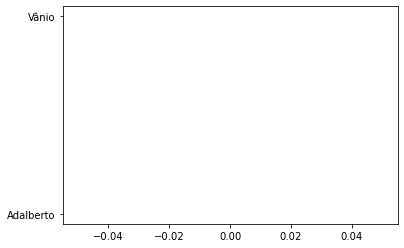

In [170]:
snb.scatterplot(data=teste.groupby(['Equipamento','Nome'])['Tempo de OS'].agg([lambda x:x.mean()]).sort_values('<lambda>',ascending = False).head(30),x='<lambda>',y='Nome')